In [37]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score,matthews_corrcoef,confusion_matrix,roc_curve, precision_recall_curve, auc
import numpy as np
import matplotlib.pyplot as plt


In [26]:
#Read initial data
file_path='rtfDataSet.csv'
df = pd.read_csv(file_path)
print(df.head())

       0      1      2      3      4      5      6      7      8      9  ...  \
0 -0.536  0.292 -0.684  0.123 -0.118  0.346 -0.308 -0.113  0.401 -0.399  ...   
1 -0.496 -0.298 -0.529  0.073 -0.072  0.107 -0.316 -0.066 -0.168 -0.099  ...   
2  0.008 -0.031 -0.240  0.178 -0.120  0.317 -0.481  0.031 -0.077  0.063  ...   
3 -0.188 -0.180 -0.062 -0.104 -0.136 -0.061 -0.216 -0.143  0.068 -0.189  ...   
4  0.038  0.155 -0.203 -0.088 -0.084 -0.164 -0.145 -0.168  0.008  0.143  ...   

      61     62     63     64     65     66     67     68     69  label  
0 -0.135 -0.063 -0.410 -0.223 -0.599 -0.136 -0.329 -0.132 -0.266      0  
1  0.189  0.007 -0.362 -0.151 -0.338 -0.031 -0.159 -0.097 -0.131      0  
2 -0.035  0.101 -0.098 -0.172 -0.290  0.033 -0.342 -0.321 -0.238      0  
3  0.146 -0.145 -0.527 -0.292 -0.663 -0.078 -0.194 -0.151 -0.268      0  
4  0.019 -0.084  0.164 -0.165 -0.126 -0.112  0.029 -0.138  0.148      1  

[5 rows x 71 columns]


In [27]:
#Reduce to sets and normalized
set_1=[1, 5, 10, 13, 14, 16, 17, 19, 25, 26, 29, 30, 36, 46, 51, 57]
set_2=[2, 5, 9, 10, 16, 21, 28, 34, 38, 48, 49, 55, 61, 62, 64]
set_3=[1, 2, 7, 8, 9, 10, 19, 23, 28, 34, 35, 36, 42, 44, 45, 47, 48, 49, 53, 55, 56, 57, 58, 63, 64, 65, 67]
set_4=[2, 3, 12, 16, 21, 23, 28, 34, 35, 45, 48, 50, 53, 61]
set_5=[2, 10, 11, 12, 14, 22, 36, 41, 46, 50, 55, 56, 57, 58, 65]

reduced_df_1=df.iloc[:,set_1]
reduced_df_2=df.iloc[:,set_2]
reduced_df_3=df.iloc[:,set_3]
reduced_df_4=df.iloc[:,set_4]
reduced_df_5=df.iloc[:,set_5]
y = df.iloc[:, -1]

scaler = MinMaxScaler()
reduced_df_1 = scaler.fit_transform(reduced_df_1)
reduced_df_2 = scaler.fit_transform(reduced_df_2)
reduced_df_3 = scaler.fit_transform(reduced_df_3)
reduced_df_4 = scaler.fit_transform(reduced_df_4)
reduced_df_5 = scaler.fit_transform(reduced_df_5)
#Array of sets
reduced_array=[reduced_df_1,reduced_df_2,reduced_df_3,reduced_df_4,reduced_df_5]

Set:  1
Accuracy: 0.70
Precision: 0.73
Recall: 0.81
AUC: 0.69
F1: 0.74
Sensitivity: 0.66
Specificity: 0.62


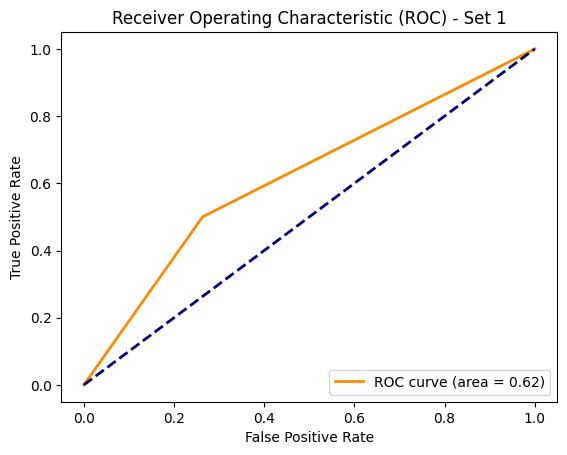

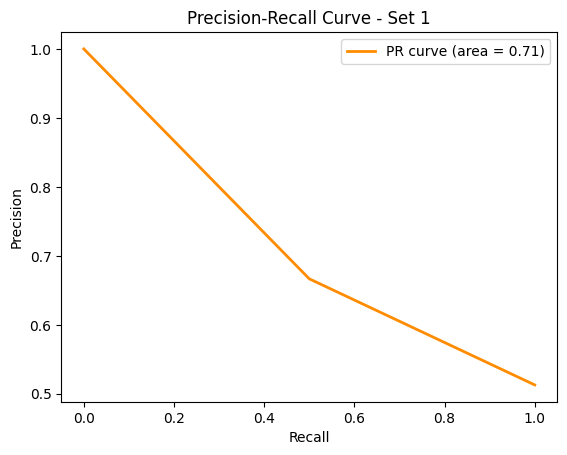

Set:  2
Accuracy: 0.78
Precision: 0.82
Recall: 0.85
AUC: 0.78
F1: 0.78
Sensitivity: 0.66
Specificity: 0.63


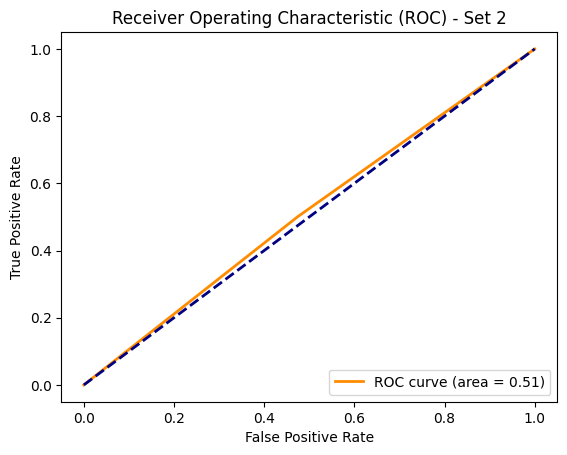

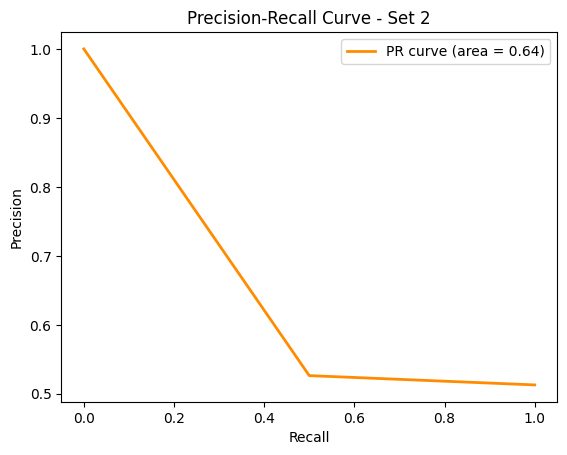

Set:  3
Accuracy: 0.80
Precision: 0.80
Recall: 0.95
AUC: 0.80
F1: 0.83
Sensitivity: 0.68
Specificity: 0.69


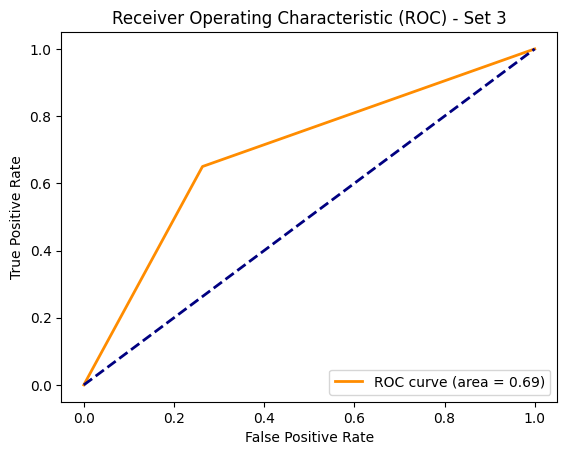

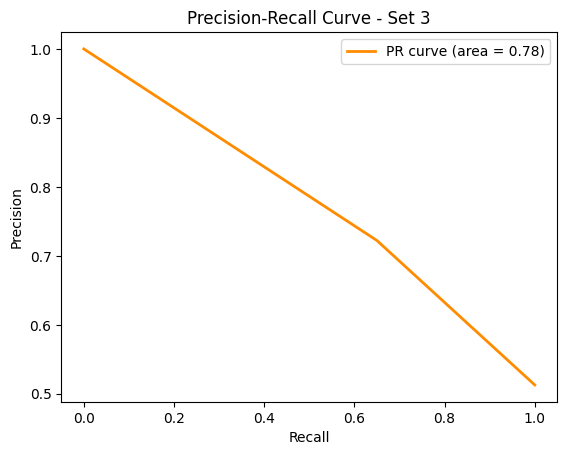

Set:  4
Accuracy: 0.85
Precision: 0.85
Recall: 0.85
AUC: 0.85
F1: 0.85
Sensitivity: 0.58
Specificity: 0.64


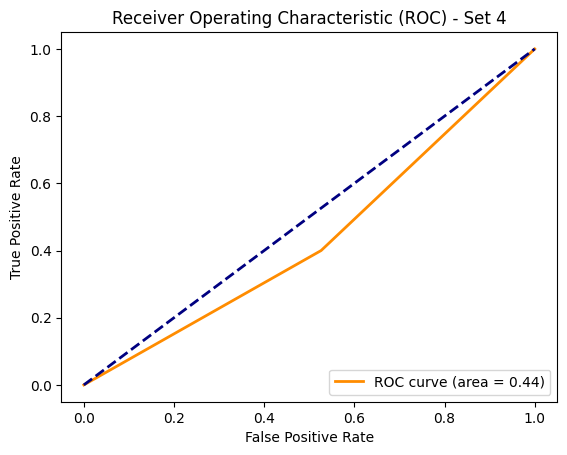

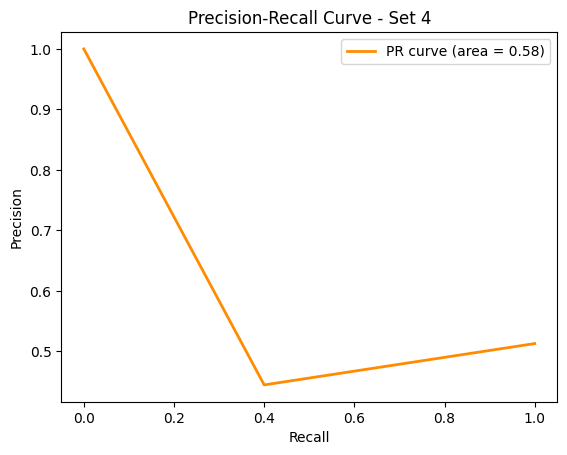

Set:  5
Accuracy: 0.85
Precision: 0.85
Recall: 0.86
AUC: 0.85
F1: 0.85
Sensitivity: 0.79
Specificity: 0.63


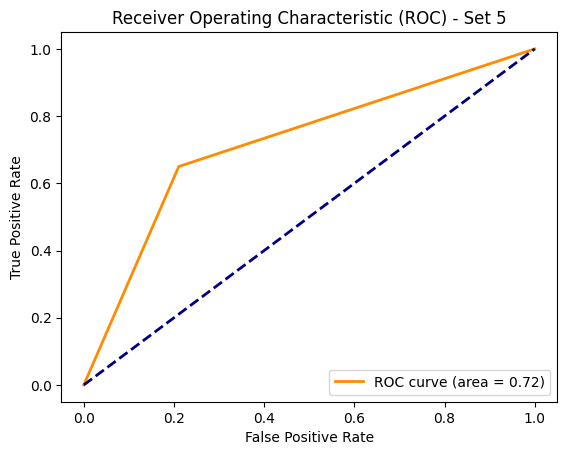

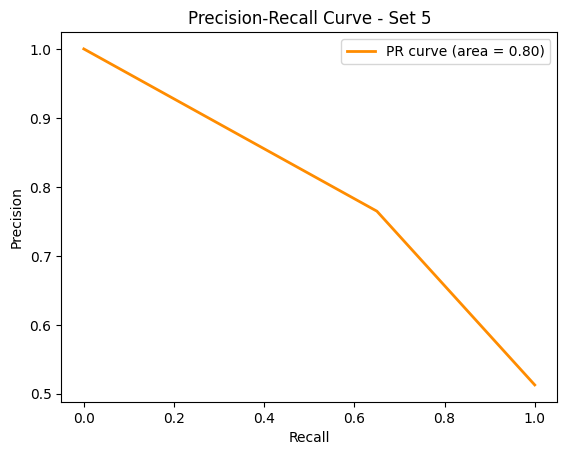

In [39]:
#Creacion dinamica de folds y clasificacion y metricas
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
counter=1
#Information gain tree
for X in reduced_array:
    print("Set: ",counter)
    array_accuracy_gini = []
    array_precision_gini = []
    array_recall_gini = []
    array_auc_gini = []
    array_f1_gini = []
    matthews_corrcoef_gini = []
    sensitivity_gini = []
    specificity_gini = []
    for fold,(train_index,val_index) in enumerate(stratified_kfold.split(X,y)):
        X_train,X_val=X[train_index],X[val_index]
        y_train,y_val=y[train_index],y[val_index]

        #Gini decision tree
        clf = DecisionTreeClassifier(criterion='gini')
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_val)

        #Accuracy
        gini_acc=accuracy_score(y_val, y_pred)
        array_accuracy_gini.append(gini_acc)
        #Precision
        gini_precision=precision_score(y_val, y_pred)
        array_precision_gini.append(gini_precision)
        #Recall
        gini_recall=recall_score(y_val, y_pred)
        array_recall_gini.append(gini_recall)
        #AUC
        gini_auc=roc_auc_score(y_val, y_pred)
        array_auc_gini.append(gini_auc)
        #F1
        gini_f1=f1_score(y_val, y_pred)
        array_f1_gini.append(gini_f1)
        #Confusion matrix
        conf_matrix = confusion_matrix(y_val, y_pred)
        TP = conf_matrix[1, 1]
        TN = conf_matrix[0, 0]
        FP = conf_matrix[0, 1]
        FN = conf_matrix[1, 0]
        # Calculate sensitivity and specificity
        sensitivity = TP / (TP + FN)
        sensitivity_gini.append(sensitivity)
        specificity = TN / (TN + FP)
        specificity_gini.append(specificity)
    mean_accuracy_gini = np.max(array_accuracy_gini)
    mean_precision_gini = np.max(array_precision_gini)
    mean_recall_gini = np.max(array_recall_gini)
    mean_auc_gini = np.max(array_auc_gini)
    mean_f1_gini = np.max(array_f1_gini)
    mean_sensitivity_gini = np.mean(sensitivity_gini)
    mean_specificity_gini = np.mean(specificity_gini)
    

    print(f"Accuracy: {mean_accuracy_gini:.2f}")
    print(f"Precision: {mean_precision_gini:.2f}")
    print(f"Recall: {mean_recall_gini:.2f}")
    print(f"AUC: {mean_auc_gini:.2f}")
    print(f"F1: {mean_f1_gini:.2f}")
    print(f"Sensitivity: {mean_sensitivity_gini:.2f}")
    print(f"Specificity: {mean_specificity_gini:.2f}")
    # AUC plot
    fpr, tpr, _ = roc_curve(y_val, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) - Set {}'.format(counter))
    plt.legend(loc="lower right")
    plt.show()

    # Precision-Recall plot
    precision, recall, _ = precision_recall_curve(y_val, y_pred)
    pr_auc = auc(recall, precision)
    plt.figure()
    plt.plot(recall, precision, color='darkorange', lw=2, label='PR curve (area = {:.2f})'.format(pr_auc))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve - Set {}'.format(counter))
    plt.legend(loc="upper right")
    plt.show()
    counter+=1
        


        